In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter

import os; print(os.getcwd())

import result_utils

plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['font.size'] = 11
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams['axes.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['figure.edgecolor'] = 'k'

/net/lem/data1/regt/retrieval_base/Luhman_16/figures


In [2]:
name_A = 'Luhman 16A'; name_B = 'Luhman 16B'
color_A = '#FF622E'; color_B = '#396ED8'

lw_d = 0.8
lw_m = 1.0

res_alpha = 0.85

A = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_22_1column_n1000/test_')
B = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n1000/test_')

/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_22_1column_n1000/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_22_1column_n1000/test_.txt
/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n1000/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n1000/test_.txt


In [ ]:
def indicate_lines(ax, x, y, label, label_y=None, **kwargs):

    X = np.array([x[0],x[0],x[1],x[1]])
    Y = np.array([y[0],y[1],y[1],y[0]])
    ax.plot(X, Y, c='k', transform=ax.get_xaxis_transform(), **kwargs)

    text_kwargs = dict(ha='center', va='center', fontsize=12)
    if label_y is None:
        label_y = y[1]
        text_kwargs['bbox'] = {'boxstyle':'square,pad=0.2', 'ec':'none', 'fc':'w'}

    ax.text(x=x.mean(), y=label_y, s=label, transform=ax.get_xaxis_transform(), **text_kwargs)

In [4]:
A.load_components(['d_spec', 'LogLike'])
B.load_components(['d_spec', 'LogLike'])

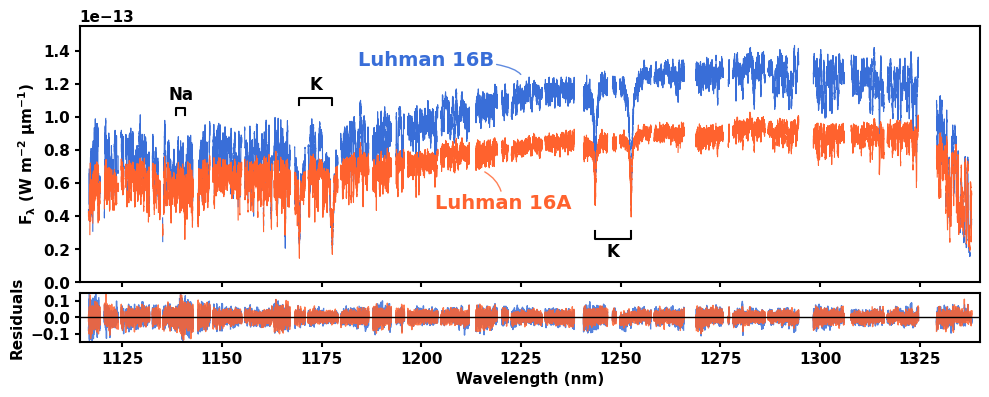

In [5]:
fig = plt.figure(figsize=(10,4))
gs = fig.add_gridspec(nrows=2, ncols=1, hspace=0.07, wspace=0, height_ratios=[0.84,0.16])
ax_res = fig.add_subplot(gs[1,0])
ax     = fig.add_subplot(gs[0,0])

# Plot the data and model fluxes
mask = B.d_spec['J1226_1'].flux.flatten()/B.d_spec['J1226_1'].flux.flatten()
ax.plot(B.d_spec['J1226_1'].wave.flatten(), B.d_spec['J1226_1'].flux.flatten(), c=color_B, lw=lw_d)

mask = A.d_spec['J1226_1'].flux.flatten()/A.d_spec['J1226_1'].flux.flatten()
ax.plot(A.d_spec['J1226_1'].wave.flatten(), A.d_spec['J1226_1'].flux.flatten(), c=color_A, lw=lw_d)

# Name labels
ax.annotate(
    name_A, xy=(0.45,0.43), xytext=(0.47,0.27), xycoords='axes fraction', ha='center', va='bottom', c=color_A, fontsize=14, fontweight='bold',   
    arrowprops={'arrowstyle':'-', 'connectionstyle':'angle3,angleA=90,angleB=-30', 'shrinkA':0, 'shrinkB':0, 'lw':1, 'color':color_A, 'alpha':0.8}, 
    )
ax.annotate(
    name_B, xy=(0.49,0.81), xytext=(0.46,0.83), xycoords='axes fraction', ha='right', va='bottom', c=color_B, fontsize=14, fontweight='bold', 
    arrowprops={'arrowstyle':'-', 'connectionstyle':'angle3,angleA=0,angleB=-50', 'shrinkA':0, 'shrinkB':0, 'lw':1, 'color':color_B, 'alpha':0.8}, 
    )

# Indicate lines
wave_Na = np.array([1e7/8783.82852, 1e7/8766.63258]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax, wave_Na, [0.65,0.68], label='Na', label_y=0.73, lw=1.5)

wave_K = np.array([1e7/8551.81787, 1e7/8491.80409]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax, wave_K, [0.69,0.72], label='K', label_y=0.77, lw=1.5)

wave_K = np.array([1e7/7983.67489, 1e7/8041.38112]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax, wave_K, [0.2,0.17], label='K', label_y=0.12, lw=1.5)

# Residuals
'''
ax.plot(
    B.d_spec['J1226_1'].wave.flatten(), (B.d_spec['J1226_1'].flux-np.array(B.LogLike.m_flux_phi)).flatten(), c=color_B, lw=lw_m, alpha=res_alpha
)
ax.plot(
    A.d_spec['J1226_1'].wave.flatten(), (A.d_spec['J1226_1'].flux-np.array(A.LogLike.m_flux_phi)).flatten(), c=color_A, lw=lw_m, alpha=res_alpha
)
ax.axhline(0, c='k', lw=0.8, ls='-')
'''
ax_res.plot(
    B.d_spec['J1226_1'].wave.flatten(), 1e13*(B.d_spec['J1226_1'].flux-np.array(B.LogLike.m_flux_phi)).flatten(),
    c=color_B, lw=lw_m, alpha=res_alpha
)
ax_res.plot(
    A.d_spec['J1226_1'].wave.flatten(), 1e13*(A.d_spec['J1226_1'].flux-np.array(A.LogLike.m_flux_phi)).flatten(),
    c=color_A, lw=lw_m, alpha=res_alpha
)
ax_res.axhline(0, c='k', lw=1.0, ls='-')

'''
idx = slice(20,21)
ax_zoom = ax.inset_axes([0.64, 0.09, 0.3, 0.36])

ax_zoom.plot(B.d_spec['J1226_1'].wave[idx].flatten(), B.d_spec['J1226_1'].flux[idx].flatten(), c=color_B, lw=lw_d, alpha=res_alpha)
ax_zoom.plot(A.d_spec['J1226_1'].wave[idx].flatten(), A.d_spec['J1226_1'].flux[idx].flatten(), c=color_A, lw=lw_d, alpha=res_alpha)

mask = B.d_spec['J1226_1'].flux[idx].flatten()/B.d_spec['J1226_1'].flux[idx].flatten()
ax_zoom.plot(B.d_spec['J1226_1'].wave[idx].flatten(), np.array(B.LogLike.m_flux_phi[idx]).flatten()*mask, c='k', lw=0.8)
mask = A.d_spec['J1226_1'].flux[idx].flatten()/A.d_spec['J1226_1'].flux[idx].flatten()
ax_zoom.plot(A.d_spec['J1226_1'].wave[idx].flatten(), np.array(A.LogLike.m_flux_phi[idx]).flatten()*mask, c='k', lw=0.8)

xlim = (A.d_spec['J1226_1'].wave_ranges_chips[idx].min(), A.d_spec['J1226_1'].wave_ranges_chips[idx].max())
xlim = (1286.8, 1294.7)

ax_zoom.set(yticks=[], xlim=xlim)
ax_zoom.tick_params(axis='x', which='both', pad=2)
ax_zoom.set_xticks(np.arange(1287, 1295, 2), minor=True)
ax.indicate_inset_zoom(ax_zoom)
'''

xticks = np.arange(1100, 1400, 25)
ax.set_xticks(xticks); ax_res.set_xticks(xticks)

xlim = (A.d_spec['J1226_1'].wave_ranges_chips.min()-2, A.d_spec['J1226_1'].wave_ranges_chips.max()+2)
# ax.set(xticklabels=[], ylabel=r'$F_\lambda\ (\mathrm{W\ m^{-2}\ \mu m^{-1}})$', xlim=xlim, ylim=(0.0, 1.55e-13))
ax.set(xticklabels=[], ylabel=r'$\bf F_\lambda\ (W\ m^{-2}\ \mu m^{-1})$', xlim=xlim, ylim=(0, 1.55e-13))
ax_res.set(xlabel=r'Wavelength (nm)', ylabel='Residuals', xlim=xlim, ylim=(-0.15, 0.15))

plt.subplots_adjust(left=0.08, bottom=0.14, top=0.93, right=0.98)
# plt.savefig('./plots/J_band_spectrum_poster.pdf')
plt.savefig('./plots/J_band_spectrum_poster.png')
plt.show()

In [6]:
B_2 = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n100_vdW/test_')
B_2.load_components(['d_spec', 'LogLike'])

/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n100_vdW/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n100_vdW/test_.txt


In [21]:
from retrieval_base.model_components.line_opacity import LineOpacity

# Load and modify the settings
B.load_components(['m_spec', 'LineOpacity'])
m_spec = B.m_spec['J1226_1']
m_spec.pressure = np.array([10.0,1.0,0.1,0.01])

# Initialise
kwargs = B.LineOpacity['J1226_1'][0].kwargs.copy()
Line_i = LineOpacity(m_spec=m_spec, **kwargs)
Line_wo_shift_i = LineOpacity(m_spec=m_spec, **kwargs)

# Update the settings (i.e. VMR(K)=1, T=constant)
Line_i._update_parameters(T=1500., VMRs={}, mass_fractions={}, ParamTable=B.ParamTable)
Line_wo_shift_i._update_parameters(T=1500., VMRs={}, mass_fractions={}, ParamTable=B.ParamTable)
Line_wo_shift_i.d *= 0


--- 39K__Kurucz -------------
Loaded 41 transitions, 9 will be calculated on-the-fly
On-the-fly transitions:
nu_0 (cm^-1): [9072.05  9069.742 8551.802 8494.092 8491.784 8041.365 7983.655 6593.17
 6590.862]
wave_0 (nm):  [1102.287 1102.567 1169.344 1177.289 1177.609 1243.57  1252.559 1516.721
 1517.252]


--- 39K__Kurucz -------------
Loaded 41 transitions, 9 will be calculated on-the-fly
On-the-fly transitions:
nu_0 (cm^-1): [9072.05  9069.742 8551.802 8494.092 8491.784 8041.365 7983.655 6593.17
 6590.862]
wave_0 (nm):  [1102.287 1102.567 1169.344 1177.289 1177.609 1243.57  1252.559 1516.721
 1517.252]



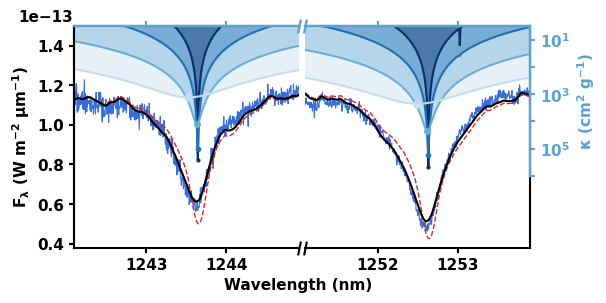

In [113]:
# cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['C0','k'])
# cmap = plt.get_cmap('magma_r')
cmap = plt.get_cmap('Blues')
idx = [15,16]
width = 2.8
xlim = [1243.5+np.array([-1,1])*width/2, 1252.5+np.array([-1,1])*width/2]
ylim = [0.38e-13, 1.5e-13]
ylim_opa = [1e6, 3e0]
yticks_opa = [1e1,1e2,1e3,1e4,1e5,1e6]
yticklabels_opa = [r'$10^1$', '', r'$10^3$', '', r'$10^5$', '']

fig = plt.figure(figsize=(6,3))
gs = fig.add_gridspec(nrows=2, ncols=2, hspace=0.07, wspace=0.03, height_ratios=[0.7,0.3])
# ax_opa = fig.add_subplot(gs[1,0])
ax = np.array([fig.add_subplot(gs[:,0]), fig.add_subplot(gs[:,1])])
ax_opa = np.array([fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1])])

# ax_opa = np.array([ax[0].twinx(), ax[1].twinx()])

for i in range(len(ax)):
    ax[i].plot(B.d_spec['J1226_1'].wave[idx[i]], B.d_spec['J1226_1'].flux[idx[i]], c=color_B, lw=lw_d)
    ax[i].plot(B_2.d_spec['J1226_1'].wave[idx[i]], np.array(B_2.LogLike.m_flux_phi[idx[i]]), c='C3', lw=1., ls='--')
    ax[i].plot(B.d_spec['J1226_1'].wave[idx[i]], np.array(B.LogLike.m_flux_phi[idx[i]]), c='k', lw=1.5)

    ax[i].set(xlim=xlim[i], ylim=ylim)

    wave_micron = 1e4/Line_i.nu_grid[idx[i]]
    opacity = Line_i.abs_opacity(wave_micron, m_spec.pressure)
    for j, opa_j in enumerate(opacity.T):
        c_j = cmap((j+1)/len(m_spec.pressure))
        ax_opa[i].fill_between(1e3*wave_micron*(1+B.d_spec['J1226_1'].v_bary/3e5), opa_j, 1e-10, fc=c_j, alpha=0.4, ec='none', zorder=j-10)
        ax_opa[i].plot(1e3*wave_micron * (1+B.d_spec['J1226_1'].v_bary/3e5), opa_j, c=c_j, lw=1.5, zorder=-j)
        ax_opa[i].plot(1e3*wave_micron[np.argmax(opa_j)] * (1+B.d_spec['J1226_1'].v_bary/3e5), np.max(opa_j), 'o', markersize=5-j, c=c_j)

    # ax[i].axvline(1e7/8041.365 * (1+B.ParamTable.get('rv')/3e5), c='k', lw=1.5, ls='--')
    # ax[i].axvline(1e7/7983.655 * (1+B.ParamTable.get('rv')/3e5), c='k', lw=1.5, ls='--')

    # wave_micron = 1e4/Line_wo_shift_i.nu_grid[idx[i]]
    # opacity = Line_wo_shift_i.abs_opacity(wave_micron, m_spec.pressure)
    # for j, opa_j in enumerate(opacity.T):
    #     c_j = cmap((j+1)/len(m_spec.pressure))
    #     ax_opa[i].plot(1e3*wave_micron * (1+B.d_spec['J1226_1'].v_bary/3e5), opa_j, c=c_j, lw=1.5, ls='--')

    ax_opa[i].set(xlim=xlim[i], yscale='log', ylim=ylim_opa, xticklabels=[])
    ax_opa[i].xaxis.tick_top()

ax[0].spines['right'].set_visible(False); ax[1].spines['left'].set_visible(False)
ax[1].set(yticks=[])
ax[0].set(ylabel=r'$\bf F_\lambda\ (W\ m^{-2}\ \mu m^{-1})$')
ax[0].set_xlabel('Wavelength (nm)', x=1)

c = cmap(0.55)
ax_opa[0].spines[['right','bottom']].set_visible(False)
ax_opa[1].spines[['left','bottom']].set_visible(False)
ax_opa[0].set(yticks=[])
ax_opa[0].spines[['top']].set(color=c, lw=1.7)
ax_opa[1].spines[['right','top']].set(color=c, lw=1.7)

ax_opa[0].tick_params(axis='both', colors=c, labelcolor=c)
ax_opa[1].tick_params(axis='both', colors=c, labelcolor=c)

ax_opa[1].set(yticks=yticks_opa, yticklabels=yticklabels_opa)
ax_opa[1].yaxis.set_label_position('right')
ax_opa[1].set_ylabel(r'$\bf\kappa\ (cm^2\ g^{-1})$', color=c)
ax_opa[1].yaxis.tick_right()

# Indicate break in the x-axis
d = 5
kwargs = dict(
    marker=[(-1,-d),(1,d)], markersize=10, linestyle='none', color='k', mec='k', mew=1.5, clip_on=False,
    )
ax[0].plot([1], [0], transform=ax[0].transAxes, **kwargs)
ax[1].plot([0], [0], transform=ax[1].transAxes, **kwargs)

kwargs['mew'] = 1.7
kwargs['color'] = c
kwargs['mec'] = c
ax_opa[0].plot([1], [1], transform=ax_opa[0].transAxes, **kwargs)
ax_opa[1].plot([0], [1], transform=ax_opa[1].transAxes, **kwargs)

t = ax[0].yaxis.get_offset_text()
t.set_x(-0.25)

plt.subplots_adjust(left=0.12, bottom=0.17, top=0.91, right=0.88)
plt.savefig('./plots/J_band_K_doublet_poster.pdf')
# plt.savefig('./plots/J_band_K_doublet_poster.png')
plt.show()